In [1]:
from decimal import Decimal
import numpy as np
from datetime import timedelta

from SimCAD import configs
from SimCAD.configuration import Configuration
from SimCAD.configuration.utils import exo_update_per_ts, proc_trigger, bound_norm_random, \
    ep_time_step

In [2]:
sim_config = {
    'N': 1,
    'T': range(100000)
}
seed = {}
env_processes = {}
initial_condition = {
    'Prey': float(10),
    'Predator': float(10),
    'timestamp': '2018-01-01 00:00:00'
}

In [3]:

# Behaviors
# There are no behaviors in this example

# Mechanisms
# There are no mechanisms in this example

# Parameters
alfa = 1.1e-3
beta = 0.4e-3
gama = 0.4e-3
delta = 0.1e-3

# Exogenous States
def prey_model(step, sL, s, _input):
    y = 'Prey'
    x = s['Prey'] + alfa*s['Prey'] - beta*s['Prey']*s['Predator']
    return (y, x)

def predator_model(step, sL, s, _input):
    y = 'Predator'
    x = s['Predator'] + delta*s['Prey']*s['Predator'] - gama*s['Predator']
    return (y, x)

ts_format = '%Y-%m-%d %H:%M:%S'
t_delta = timedelta(days=0, minutes=0, seconds=1)
def time_model(step, sL, s, _input):
    y = 'timestamp'
    x = ep_time_step(s, dt_str=s['timestamp'], fromat_str=ts_format, _timedelta=t_delta)
    return (y, x)


exogenous_states = exo_update_per_ts(
    {
    'Prey': prey_model,
    'Predator': predator_model,
    'timestamp': time_model
    }
)


mechanisms = {
}


configs.append(
    Configuration(
        sim_config=sim_config,
        state_dict=initial_condition,
        seed=seed,
        exogenous_states=exogenous_states,
        env_processes=env_processes,
        mechanisms=mechanisms
    )
)

In [4]:
# Behaviors
def hunter(step, sL, s):
    kill = 0
    if (s['Predator'] > 2 * s['Prey']):
        kill = s['Predator']*0.5
    return {'value': kill}

def dummy_behavior(step, sL, s):
    return {'value': 0}

# Mechanisms
def hunt(step, sL, s, _input):
    y = 'Predator'
    x = s['Predator'] - _input['value']
    return (y, x)


# Parameters
alfa = 1.1e-3
beta = 0.4e-3
gama = 0.4e-3
delta = 0.1e-3

# Exogenous States
def prey_model(step, sL, s, _input):
    y = 'Prey'
    x = s['Prey'] + alfa*s['Prey'] - beta*s['Prey']*s['Predator']
    return (y, x)

def predator_model(step, sL, s, _input):
    y = 'Predator'
    x = s['Predator'] + delta*s['Prey']*s['Predator'] - gama*s['Predator']
    return (y, x)

ts_format = '%Y-%m-%d %H:%M:%S'
t_delta = timedelta(days=0, minutes=0, seconds=1)
def time_model(step, sL, s, _input):
    y = 'timestamp'
    x = ep_time_step(s, dt_str=s['timestamp'], fromat_str=ts_format, _timedelta=t_delta)
    return (y, x)


exogenous_states = exo_update_per_ts(
    {
#     'Prey': prey_model,
#     'Predator': predator_model,
    'timestamp': time_model
    }
)


mechanisms = {
    'nature': {
        'behaviors': {
            'dummy': dummy_behavior
        },
        'states': { 
            'Prey': prey_model,
            'Predator': predator_model
        }
        
    },
    'hunt_season': {
        'behaviors': {
            'hunter': hunter
        },
        'states': { 
            'Predator': hunt
        }
    }
}


configs.append(
    Configuration(
        sim_config=sim_config,
        state_dict=initial_condition,
        seed=seed,
        exogenous_states=exogenous_states,
        env_processes=env_processes,
        mechanisms=mechanisms
    )
)

multi_proc: [<SimCAD.configuration.Configuration object at 0x10c95c358>, <SimCAD.configuration.Configuration object at 0x10c9b0b00>]


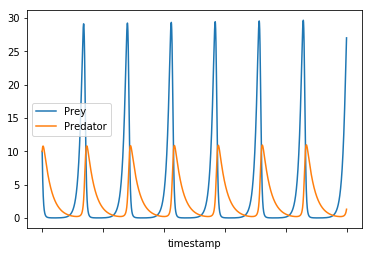

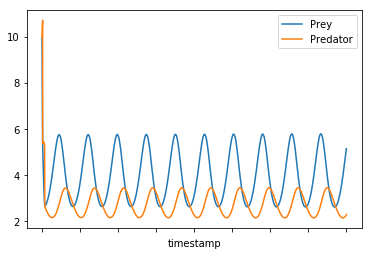

In [5]:
%matplotlib inline
import pandas as pd
from tabulate import tabulate

from SimCAD.engine import ExecutionMode, ExecutionContext, Executor
from SimCAD import configs

exec_mode = ExecutionMode()


multi_proc_ctx = ExecutionContext(context=exec_mode.multi_proc)
run = Executor(exec_context=multi_proc_ctx, configs=configs)
results = run.main()
for raw_result, tensor_field in results:
    result = pd.DataFrame(raw_result)
    result.plot('timestamp', ['Prey','Predator'])

In [6]:
a = pd.DataFrame(results[0][0])
b = pd.DataFrame(results[1][0])

In [7]:
a['Prey'].min()

0.017634498287318664

In [8]:
b['Prey'].min()

2.6177520081711023